In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('water_potability.csv')

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
null_cols = ['ph','Sulfate','Trihalomethanes']
for col in null_cols:
    print(col,'\n\nImpotable:\n\n',df[df["Potability"]==0][col].describe(),'\n\nPotable:\n\n',df[df["Potability"]==1][col].describe(),end='\n\n')

ph 

Impotable:

 count    1684.000000
mean        7.085378
std         1.683499
min         0.000000
25%         6.037723
50%         7.035456
75%         8.155510
max        14.000000
Name: ph, dtype: float64 

Potable:

 count    1101.000000
mean        7.073783
std         1.448048
min         0.227499
25%         6.179312
50%         7.036752
75%         7.933068
max        13.175402
Name: ph, dtype: float64

Sulfate 

Impotable:

 count    1510.000000
mean      334.564290
std        36.745549
min       203.444521
25%       311.264006
50%       333.389426
75%       356.853897
max       460.107069
Name: Sulfate, dtype: float64 

Potable:

 count    985.000000
mean     332.566990
std       47.692818
min      129.000000
25%      300.763772
50%      331.838167
75%      365.941346
max      481.030642
Name: Sulfate, dtype: float64

Trihalomethanes 

Impotable:

 count    1891.000000
mean       66.303555
std        16.079320
min         0.738000
25%        55.706530
50%        66.542198


In [8]:
mask1 = df['Potability']==0
mask2 = df['Potability']==1
for col in null_cols:
    if col!='Sulfate':
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df.loc[mask1,col] = df.loc[mask1,col].fillna(df.loc[mask1, col].mean())
        df.loc[mask2,col] = df.loc[mask2,col].fillna(df.loc[mask2, col].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


C:\Users\Rahul's PC\AppData\Local\Temp\ipykernel_16920\3244238310.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [9]:
df['ph'] = df['ph'].round().astype(int)
df['Hardness'] = df['Hardness'].round().astype(int)
df['Solids'] = df['Solids'].round().astype(int)
df['Chloramines'] = df['Chloramines'].round().astype(int)
df['Sulfate'] = df['Conductivity'].round().astype(int)
df['Organic_carbon'] = df['Organic_carbon'].round().astype(int)
df['Trihalomethanes'] = df['Trihalomethanes'].round().astype(int)
df['Turbidity'] = df['Turbidity'].round().astype(int)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7,205,20791,7,564,564.308654,10,87,3,0
1,4,129,18630,7,593,592.885359,15,56,5,0
2,8,224,19910,9,419,418.606213,17,66,3,0
3,8,214,22018,8,363,363.266516,18,100,5,0
4,9,181,17979,7,398,398.410813,12,32,4,0


In [10]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,9].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_Test, Y_train, Y_Test = train_test_split(X,Y, test_size=0.3)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.fit_transform(X_train)
X_Test=scaler.fit_transform(X_Test)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score

In [26]:
models={
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

In [35]:
accuracyMet=[]
for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(X_train,Y_train)
  y_test_pred=model.predict(X_Test)
  #test-Score-Calculations
  model_accuracy = accuracy_score(Y_Test,y_test_pred)
  accuracyMet.append(model_accuracy)
  model_f1=f1_score(Y_Test,y_test_pred,average='weighted')
  model_precision=precision_score(Y_Test,y_test_pred)
  model_recall=recall_score(Y_Test,y_test_pred)
  print(list(models.keys())[i])
  print("model performance for test set")
  print("accuracy:{:.4f}".format(model_accuracy))
  print('f1 score:{:.4f}'.format(model_f1))
  print('precision: {:.4f}'.format(model_precision))
  print('recall: {:.4f}'.format(model_recall))
  print('='*35)
print('\n')

K-Nearest Neighbors
model performance for test set
accuracy:0.5788
f1 score:0.5699
precision: 0.4494
recall: 0.3717
Decision Tree
model performance for test set
accuracy:0.5554
f1 score:0.5549
precision: 0.4271
recall: 0.4215
Random Forest
model performance for test set
accuracy:0.6267
f1 score:0.5874
precision: 0.5410
recall: 0.2592




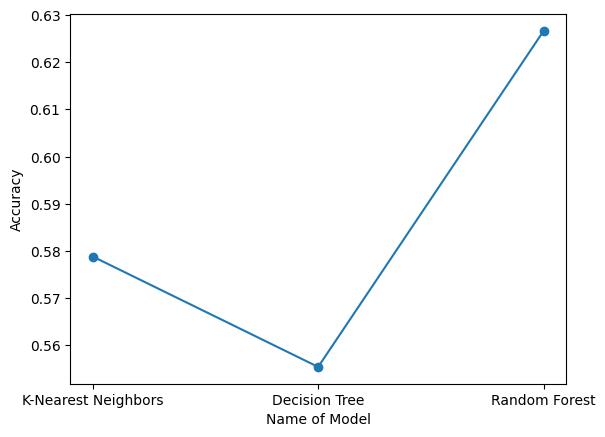

In [36]:
ModelsList=["K-Nearest Neighbors","Decision Tree","Random Forest"]
plt.plot(ModelsList, accuracyMet, marker='o')
plt.xlabel('Name of Model')
plt.ylabel('Accuracy')
plt.show()